# Summary Statistics

## Summary
In this notebook, we'll be covering:
- [Averages](#Averages)
- [Grouping with groupby](#Grouping-with-Groupby)
- [Determining sub-sample sizes](#Determining-sub-sample-sizes)
- [Sum, Min, Max, and Std](#Sum,-Min,-Max,-and-Std)
- [Describe](#Describe-combines-multiple-summary-statistics)
- [Aggregation](#Aggregation)
- [Graphs](#Graphs)

### Introduction
In any data set some of the earliest questions are about summary statistics. What is the mean of these data? What is the range? This section will walk you through obtaining these basic summaries.

As always, let's start by getting our dataframe loaded. For reasons that will become clear later, this version of our dataframe does have blank cells in it.

In [1]:
import pandas as pd
import numpy as np
import random

workout_dict = {'ID': [], 'Measurement Device': [], 'Heart Rate Max': [], 'Heart Rate Min': [], 'Heart Rate Avg': [],
              'Duration of exercise (min)': [], 'Exercise Type': []}
used_ids = []

for x in range(0, 500):
    id = str(random.randint(100000000, 999999999))
    while id in used_ids:
        id = random.randint(100000000, 999999999)
    used_ids.append(id)
    device = random.choice(['Skykandal', 'B-Wolf'])
    exercise = random.choice(['Running', 'Running', 'Running', 'Bicycling', 'Swimming', 'Swimming',
                              'Weight training'])
    mu = random.randint(65, 85)
    if device == 'Skykandal':
        mu += 2
    if exercise == 'Weight training':
        mu -= 5
    elif exercise == 'Running':
        mu += 10
    min_rate = int(random.gauss(mu, 10))
    max_rate = int(random.gauss(mu + 55, 25))
    while max_rate <= min_rate:
        max_rate = int(random.gauss(mu + 55, 25))
    avg = random.gauss((max_rate + min_rate) / 2, (max_rate - min_rate) / 5)
    duration = random.randint(10, 90)
    row = [device, min_rate, max_rate, avg, duration, exercise]
    # make blank cells, always make a blank on row 3 where we can see it
    if x == 2 or random.randint(0, 5) == 0:
        i = random.randint(0, 5)
        row.pop(i)
        row.insert(i, np.nan)
        # chance that more cells will be blank
        additional_blank = random.randint(0, 5)
        while additional_blank == 0:
            i = random.randint(0, 5)
            row.pop(i)
            row.insert(i, np.nan)
            additional_blank = random.randint(0, 3)
    workout_dict['ID'].append(str(id))
    workout_dict['Measurement Device'].append(row[0])
    workout_dict['Heart Rate Min'].append(row[1])
    workout_dict['Heart Rate Max'].append(row[2])
    workout_dict['Heart Rate Avg'].append(row[3])
    workout_dict['Duration of exercise (min)'].append(row[4])
    workout_dict['Exercise Type'].append(row[5])

df = pd.DataFrame(workout_dict)
df.head()

,ID,Measurement Device,Heart Rate Max,Heart Rate Min,Heart Rate Avg,Duration of exercise (min),Exercise Type
0,730347570,Skykandal,87.0,73.0,81.234563,79.0,Weight training
1,749009275,NaN,138.0,88.0,108.314047,25.0,Swimming
2,176480532,B-Wolf,136.0,85.0,NaN,32.0,Bicycling
3,805538653,B-Wolf,171.0,94.0,141.420054,88.0,Running
4,598321814,Skykandal,145.0,84.0,130.207219,30.0,Running


### Averages
One of the simplest summary statistics we could ask for is an average. Pandas supports means, medians, and modes, all with pretty much the same format. Below is code that gets, and then prints, the mean, median, and mode for Heart Rate Min. (Mode can have more than one value.)

In [2]:
min_mean = df['Heart Rate Min'].mean()
min_median = df['Heart Rate Min'].median()
min_mode = df['Heart Rate Min'].mode()

print('Mean', min_mean)
print('Median', min_median)
print('Mode', min_mode)

Mean 79.24948453608248
Median 79.0
Mode 0    82.0
Name: Heart Rate Min, dtype: float64


As you can see, each method is just the name of the average type.

These can also be applied across entire dataframes. In this case we should specify the argument numeric_only to True if we want to only get averages from numeric columns. In the case of `mode` one could get an average from a text column, but generally we don't want to try.

In [3]:
df.median(numeric_only=True)

Heart Rate Max                134.000000
Heart Rate Min                 79.000000
Heart Rate Avg                105.454212
Duration of exercise (min)     50.000000
dtype: float64

#### In the cell below, write code that calculates the mean average of the columns Heart Rate Max and Heart Rate Avg.

In [4]:
# your code goes here


### Grouping with Groupby
Averages are nice, but they become a lot more powerful when we can take subgroup averages easily. We could, of course, filter our sets repeatedly and get averages that way. Below is code that prints out the average (mean) Heart Rate Max for each device.

The nested structure works like this, if you are having difficulty with it. 
`df[df['Measurement Device'] == 'Skykandal']` returns only rows in df where the measurement device was Skykandal.

In [4]:
print('Device: B-Wolf', df[df['Measurement Device'] == 'B-Wolf']['Heart Rate Max'].mean())
print('Device: Skykandal', df[df['Measurement Device'] == 'Skykandal']['Heart Rate Max'].mean())

Device: B-Wolf 134.34285714285716
Device: Skykandal 135.9911111111111


There is a way to write code that finds the 'Heart Rate Max' average for each type of 'Measurement Device' (B-Wolf, Skykandal) all at once.

This is useful because what if there were 100 different values for 'Measurement Device' in the df dataframe instead of just two, and we wanted to repeat this average value finding process for each type of measurement device?

Pandas has a pattern to do this whole process better and more efficiently. This is `groupby`, a method of a dataframe. To get the means for Heart Rate Max for each device we can simply use the code below.

In [5]:
df.groupby('Measurement Device')['Heart Rate Max'].mean()

Measurement Device
B-Wolf       134.342857
Skykandal    135.991111
Name: Heart Rate Max, dtype: float64

The order of things is important here. Starting on the left we first group df by our variable (Measurement Device). Then we ask for a column (Heart Rate Max) from that grouped object. Finally, we ask for a mean from that column. You may find yourself tempted to write something like `df['Heart Rate Max'].groupby('Measurement Device').mean()` but that won't work, because in that call you remove the column Measurement Device and then try to groupby off of it. So group first, then ask for columns (if you want specific ones), and then ask for an average.

#### Below, write code that gives us the median for the Heart Rate Max for each group when grouped by exercise type (instead of by 'Measurement Device').

In [7]:
# your code goes here


Of course, there's no reason you need to restrict yourself to a single column. Often you'll want something like the means of all numeric columns after grouping to help look for trends.

#### Below, write code that gives us the mean of all numeric columns given after grouping by exercise type.

In [8]:
# your code goes here


We can group by more than one variable as well. This is fairly simple: we just pass a list of columns to groupby. (This should look familiar, since it's very similar to how we filter for multiple columns or access multiple columns.)

Below we have code that returns averages for each unique combination of 'Measurement Device' and 'Exercise Type' values that exist within the df dataframe. The averages in this case are found for all columns that contain numerical data.

In [9]:
df.groupby(['Measurement Device', 'Exercise Type']).mean(numeric_only=True)

Heart Rate Max  Heart Rate Min  \
Measurement Device Exercise Type                                     
B-Wolf             Bicycling            125.312500       72.937500   
                   Running              139.576271       84.857143   
                   Swimming             134.953125       72.750000   
                   Weight training      132.411765       69.058824   
Skykandal          Bicycling            138.625000       80.161290   
                   Running              142.234568       87.308642   
                   Swimming             133.478873       76.478873   
                   Weight training      128.129032       73.387097   

                                    Heart Rate Avg  Duration of exercise (min)  
Measurement Device Exercise Type                                                
B-Wolf             Bicycling             99.389504                   47.100000  
                   Running              111.966120                   47.533898  
                   Swimming             105.418173                   44.307692  
                   Weight training      101.797708                   52.500000  
Skykandal          Bicycling            107.963276                   52.516129  
                   Running              115.876938                   48.123457  
                   Swimming             105.850575                   46.271429  
                   Weight training      103.836365                   44.586207

You will notice that as these outputs get more complicated, they also print like dataframes, which is convenient.

We can even pass filtering expressions to `groupby` and effectively create columns and filter on them all at once. 
Below, we are creating a True/False column based on whether the maximum heart rate is above 100, and then getting the mean of the average heart rate for each of those groups.

In [10]:
df.groupby(df['Heart Rate Max'] > 100)['Heart Rate Avg'].mean()

Heart Rate Max
False     87.559035
True     109.853158
Name: Heart Rate Avg, dtype: float64

#### Here's a nice bit of practice putting several pieces together. Write code that gives us the mean for Heart Rate Avg for data that has been grouped by two variables: the existing variable Exercise Type and a new, calculated, variable that compares Heart Rate Max and Heart Rate Min and categorizes them as being within 40 bpm of each other, between 40 and 60 bpm of each other, or more than 60 bpm apart.

I would use an `apply` to make my second group, but there are other ways to do this. If you are struggling, use `print` or `head` to verify each piece so you can see where the issue is occuring.

In [11]:
# your code goes here


### Determining sub-sample sizes
If we are going to be grouping data we often need to see how many samples we have in these smaller groups. This is where `count` comes in. `count` is a dataframe method that can be run on whole frames or columns (or, less usefully, rows). Below, we'll print counts for all columns in df. ID should be 500, since no row is without an ID. However, you should see lower numbers elsewhere. That's because `count` doesn't count empty cells, so you are actually seeing how many values you really have to work with.

In [12]:
df.count()

ID                            500
Measurement Device            485
Heart Rate Max                488
Heart Rate Min                490
Heart Rate Avg                489
Duration of exercise (min)    486
Exercise Type                 483
dtype: int64

If we use a groupby on Exercise Type first we can detect that there are not equal numbers of people doing each exercise, or even particularly close. (While your specific data is random, the generator has a 3x higher chance of picking "Running" than "Bicycling" or "Weight Training", and a 2x higher chance of picking "Swimming" than "Bicycling" or "Weight Training".)

In [13]:
df.groupby('Exercise Type').count()

,ID,Measurement Device,Heart Rate Max,Heart Rate Min,Heart Rate Avg,Duration of exercise (min)
Exercise Type,,,,,,
Bicycling,66,64,66,65,64,63
Running,209,205,203,203,204,203
Swimming,141,137,139,138,140,139
Weight training,67,65,66,67,65,65


#### Below, write code that counts the number of individuals in each sub-category after grouping by both Exercise Type and Measurement Device.

In [14]:
# your code goes here


You can count the number of filled cells in a row by passing `axis=1` to `count`. This can be useful if you are concerned with the completeness of rows.

In [15]:
df.count(axis=1)

0      7
1      7
2      6
3      7
4      7
      ..
495    6
496    6
497    7
498    7
499    7
Length: 500, dtype: int64

That's nice, but we can't see how many rows fall into each category. How about this:

In [16]:
df[df.count(axis=1) == 7].count()

ID                            434
Measurement Device            434
Heart Rate Max                434
Heart Rate Min                434
Heart Rate Avg                434
Duration of exercise (min)    434
Exercise Type                 434
dtype: int64

The code above combines filtering with count to filter out any row whose count is less than 7 (a complete row). We then count that filtered frame, and now know how many complete rows we have.

#### Below, write a count + filter that tells us how many rows have data for all three of the following columns: Measurement Device, Heart Rate Avg, and Duration of exercise (min).

In [17]:
# your code goes here


### Sum, Min, Max, and Std

Pandas offers four more dataframe methods that can be applied just like `count` or the averages and offer basic summary statistics. (Pandas also offers many more not-so-basic methods.)

- `sum` sums up a series or dataframe.
- `min` and `max` return the minimum and maximum values, respectively.
- `std` returns the standard deviation.


Just like the averaging methods these are mathematical functions and so if you run them on a whole frame with both numerical and text columns use the keyword argument `numeric_only=True`.

#### Calculate the total number of minutes of exercise represented in our dataframe below.

In [18]:
# your code goes here


`sum` can seem like a very situational method, but one interesting use is summing over True/False columns. In these cases True is treated as a 1, and False as a 0. Remember that filters work by resolving a row to True (meets the filter conditions) or False.

In the last notebook we made a simply True/False column "Fast Heart Rate". We'll replicate this column (on a new dataframe copy) and then use sum to count how many individuals have a fast heart rate.

In [19]:
df2 = df.copy()
df2['Fast Heart Rate'] = df2['Heart Rate Avg'] > 100
df2['Fast Heart Rate'].sum()

np.int64(311)

If you have already calculated a True/False column this can be a nice trick.

We can also use these methods in more complex expressions. Below, we derive the range for all numeric columns in our dataframe.

In [20]:
df.max(numeric_only=True) - df.min(numeric_only=True)

Heart Rate Max                133.000000
Heart Rate Min                 80.000000
Heart Rate Avg                132.181471
Duration of exercise (min)     80.000000
dtype: float64

#### Below, calculate how much higher the maximum value is than the median value for all numeric columns.

In [21]:
# your code goes here


### Describe combines multiple summary statistics
One very useful method is `describe`, which prints many different summary statistics at once.

In [22]:
df.describe()

,Heart Rate Max,Heart Rate Min,Heart Rate Avg,Duration of exercise (min)
count,488.000000,490.000000,489.000000,486.00000
mean,135.965164,79.420408,108.120690,47.77572
std,24.752094,13.014024,20.026625,23.49058
min,74.000000,43.000000,49.243003,10.00000
25%,116.000000,70.000000,93.920682,28.00000
50%,137.000000,80.000000,106.607056,45.00000
75%,152.250000,89.000000,121.653392,67.75000
max,207.000000,123.000000,181.424474,90.00000


### Aggregation
Aggregation, the `agg` method, initially seems like a slow way to do basic things. Let's select the heart data columns from our dataframe, group by measurement device, and get some sums the usual way.

In [23]:
df.groupby('Measurement Device')[['Heart Rate Max', 'Heart Rate Min', 'Heart Rate Avg']].sum()

,Heart Rate Max,Heart Rate Min,Heart Rate Avg
Measurement Device,,,
B-Wolf,34421.0,20019.0,27137.309701
Skykandal,29997.0,17845.0,24234.897151


Now, let's do this with `agg`. `agg` is a funny method. It takes the names of other methods as text arguments. Here we'll pass it the name 'sum'.

In [24]:
df.groupby('Measurement Device')[['Heart Rate Max', 'Heart Rate Min', 'Heart Rate Avg']].agg('sum')

,Heart Rate Max,Heart Rate Min,Heart Rate Avg
Measurement Device,,,
B-Wolf,34421.0,20019.0,27137.309701
Skykandal,29997.0,17845.0,24234.897151


These seems like a more annoying way to do the same thing. However, what if we wanted to get the sums, the minimums, the medians, and the standard deviations? One way would be to write at least four lines of code, which would print out separately. The other way is to use `agg`.

In [25]:
df.groupby('Measurement Device')[['Heart Rate Max', 'Heart Rate Min', 'Heart Rate Avg']].agg(['sum', 'min', 'median', 'std'])

Heart Rate Max                         Heart Rate Min  \
                              sum   min median        std            sum   
Measurement Device                                                         
B-Wolf                    34421.0  74.0  136.0  25.702727        20019.0   
Skykandal                 29997.0  75.0  138.0  23.969163        17845.0   

                                           Heart Rate Avg             \
                     min median        std            sum        min   
Measurement Device                                                     
B-Wolf              43.0   78.5  12.733288   27137.309701  49.243003   
Skykandal           46.0   81.0  13.213253   24234.897151  60.692645   

                                           
                        median        std  
Measurement Device                         
B-Wolf              106.086026  20.087117  
Skykandal           106.936293  20.048617

As you can see, `agg` can take a list of method names (although not every pandas dataframe method works) and we can rapidly write our own summary statistics function.

#### Below, use agg to apply max, min, and mean to Heart Rate Max and Heart Rate Min, after grouping by exercise type.

In [26]:
# your code goes here


Another useful thing about `agg` is that `agg` returns pandas series and dataframes. Imagine that I quickly want to describe the differences between how each device takes all heart rate measures. First, let's repeat creation of that frame and name it agg_frame.

In [27]:
agg_frame = df.groupby('Measurement Device')[['Heart Rate Max', 'Heart Rate Min', 'Heart Rate Avg']].agg(['sum', 'min', 'median', 'std'])
agg_frame.head()

Heart Rate Max                         Heart Rate Min  \
                              sum   min median        std            sum   
Measurement Device                                                         
B-Wolf                    34421.0  74.0  136.0  25.702727        20019.0   
Skykandal                 29997.0  75.0  138.0  23.969163        17845.0   

                                           Heart Rate Avg             \
                     min median        std            sum        min   
Measurement Device                                                     
B-Wolf              43.0   78.5  12.733288   27137.309701  49.243003   
Skykandal           46.0   81.0  13.213253   24234.897151  60.692645   

                                           
                        median        std  
Measurement Device                         
B-Wolf              106.086026  20.087117  
Skykandal           106.936293  20.048617

The numbers I want are just the difference between the two rows.

In [28]:
agg_frame.loc['B-Wolf'] - agg_frame.loc['Skykandal']

Heart Rate Max  sum       4424.000000
                min         -1.000000
                median      -2.000000
                std          1.733564
Heart Rate Min  sum       2174.000000
                min         -3.000000
                median      -2.500000
                std         -0.479964
Heart Rate Avg  sum       2902.412550
                min        -11.449642
                median      -0.850267
                std          0.038500
dtype: float64

The dataframe returned is a multi-indexed dataframe, which means we have "levels" of indexing to access items. This is more easily demonstrated than explained, so the next two cells of code will access first all data for Heart Rate Max and then just the minimums for that section.

In [29]:
agg_frame['Heart Rate Max']

,sum,min,median,std
Measurement Device,,,,
B-Wolf,34421.0,74.0,136.0,25.702727
Skykandal,29997.0,75.0,138.0,23.969163


In [30]:
agg_frame['Heart Rate Max']['min']

Measurement Device
B-Wolf       74.0
Skykandal    75.0
Name: min, dtype: float64

As you can see, you can access the higher-level category like a column, but then treat it as if it were its own dataframe with columns named sum, min, median, and std. Or, to explain it another way, the cell directly above asks for column min from the subset of columns under the heading Heart Rate Max.

Given this, it is also possibly to compare columns across categories.

#### Below, write code that finds the differences between each summary statistic for Heart Rate Max and Heart Rate Min for each measurement device. Using agg_frame you can do this in a single line of code.

In [31]:
# your code goes here


### Graphs
Another common thing to do when investigating summary statistics is to graph data. Pandas comes with some dataframe methods that interface with the popular Python package matplotlib that provide basic graphs without much additional work. If you're interested in more complex graphs you'll want to use matplotlib directly.

We will cover the methods `bar` (bar graphs), `hist` (histograms), `box` (boxplot), `density` (density plots), and `scatter` (scatter plots). These are not the only options, but they cover many of the basics and you should be able to easily figure out how to use the other graph types by looking at pandas documentation once we have discussed the syntax for these graphs.

Let's start with an easy one: `hist`. To make a histogram of a column's values just run `hist` on the column. ALL graph types come from the `plot` method of the dataframe, which means we write `plot.hist`.

<Axes: ylabel='Frequency'>

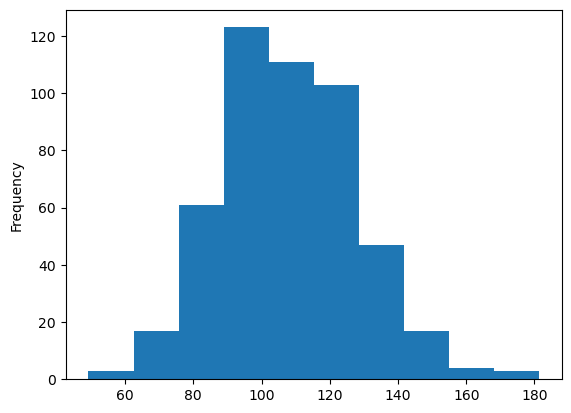

In [32]:
df['Heart Rate Avg'].plot.hist()

We can graph multiple columns by running `plot.hist` on multiple columns.

<Axes: ylabel='Frequency'>

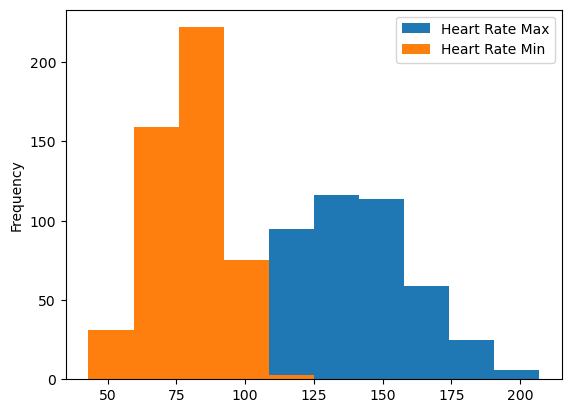

In [33]:
df[['Heart Rate Max', 'Heart Rate Min']].plot.hist()

As you can see, some of the columns hide others. Two useful keywords for `hist` are `alpha` and `bins`. `alpha` controls transparency. 1 is fully opaque, 0 is fully transparent. Below is the histogram above with a binwidth of 5 and partly-transparent columns.

`bins` is NOT binwidth, but an indirect control of binwidth by controlling the total number of bins the data is split between. So reducing `bins` makes larger binwidths.

Below is code for 5 bins and partly transparent columns.

<Axes: ylabel='Frequency'>

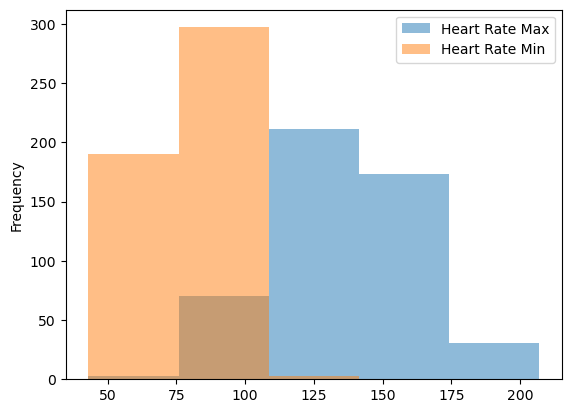

In [34]:
df[['Heart Rate Max', 'Heart Rate Min']].plot.hist(bins=5, alpha=0.5)

#### Below, write code that makes a 20-bin histogram for Heart Rate Avg.

In [35]:
# your code goes here


`density` is very similar, although without the same keywords.

<Axes: ylabel='Density'>

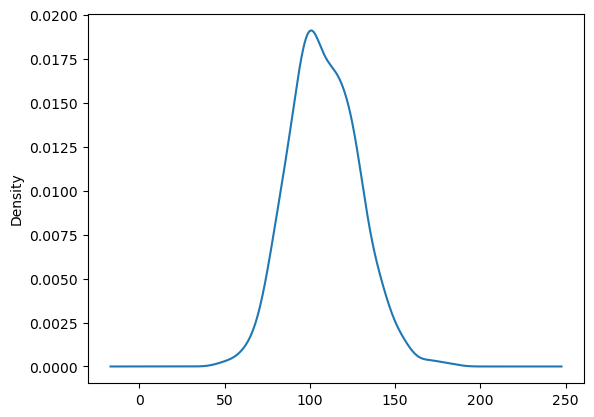

In [36]:
df['Heart Rate Avg'].plot.density()

#### Below, write code that makes a density plot for both Heart Rate Min and Heart Rate Max.

In [37]:
# your code goes here


Boxplots and scatterplots work similarly in that they operate on a dataframe and you use keywords to name the specific columns that you are going to use. These aren't the same keywords, unfortunately, but the syntax is pretty simple. In `box` you use a `column` to mark the column of values you want to graph, and `by` to run what amounts to an internal `groupby` that splits that data into categories.

Below, we make a boxplot of heart rate averages split by exercise type.

Heart Rate Avg    Axes(0.125,0.11;0.775x0.77)
dtype: object

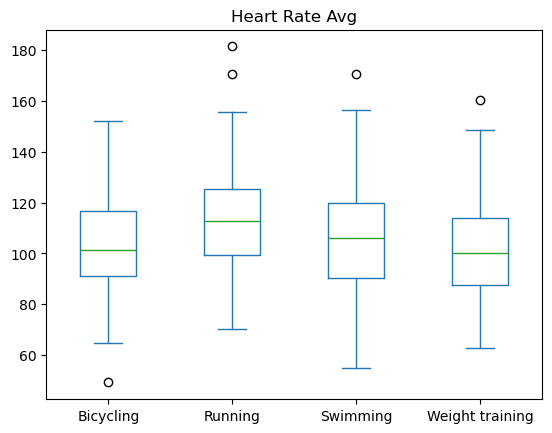

In [38]:
df.plot.box(column='Heart Rate Avg', by='Exercise Type')

`scatter` uses `x` and `y` to mark variables.

<Axes: xlabel='Heart Rate Avg', ylabel='Heart Rate Max'>

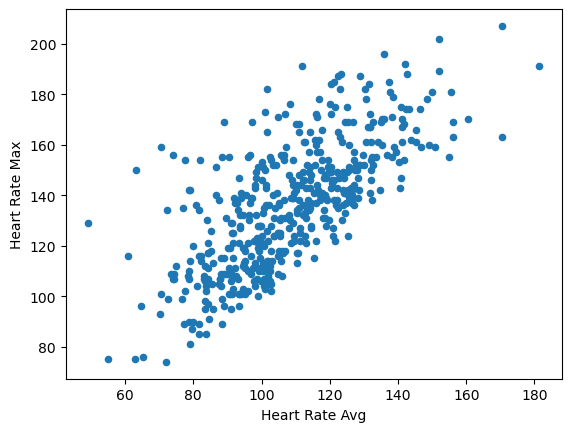

In [39]:
df.plot.scatter(x='Heart Rate Avg', y='Heart Rate Max')

#### Below, make a boxplot of average heart rate split by measurement device.

In [ ]:
# your code goes here

#### Now make a scatterplot of heart rate average by duration of exercise. There should be no visible trend.

In [ ]:
# your code goes here

Bar charts are slightly trickier, but not because of the syntax. The syntax of `bar` is fairly straightforward, requiring only a `y` keyword, although an `x` can be used to specify groups. However, the results can be odd.

Below, we will make a bar chart for average heart rate split by exercise type. This may take a minute to run.

<Axes: xlabel='Exercise Type'>

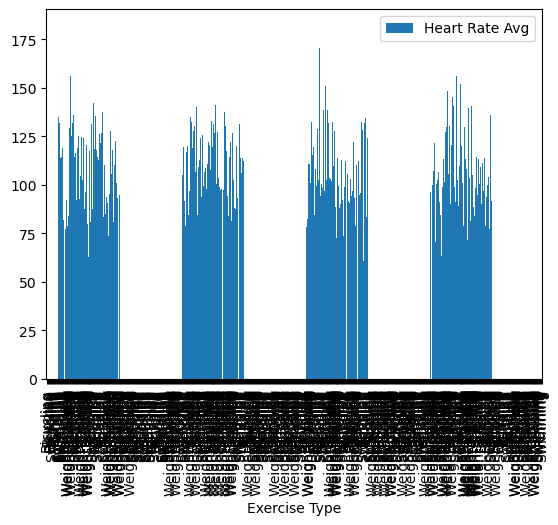

In [40]:
df.plot.bar(x='Exercise Type', y='Heart Rate Avg')

This is a mess. The tricky part about `bar` is it really only wants one value to graph for each bar. So let's use `groupby` to make that happen.

In [41]:
graph_frame = df.groupby('Exercise Type').mean(numeric_only=True)
graph_frame.head()

,Heart Rate Max,Heart Rate Min,Heart Rate Avg,Duration of exercise (min)
Exercise Type,,,,
Bicycling,131.500000,76.276923,103.676824,49.190476
Running,140.714286,85.768473,113.455627,47.847291
Swimming,134.489209,74.637681,105.495741,45.798561
Weight training,130.015152,71.402985,102.924045,48.600000


Now we can simply use `y` to get our bar chart, with no need for `x`.

<Axes: xlabel='Exercise Type'>

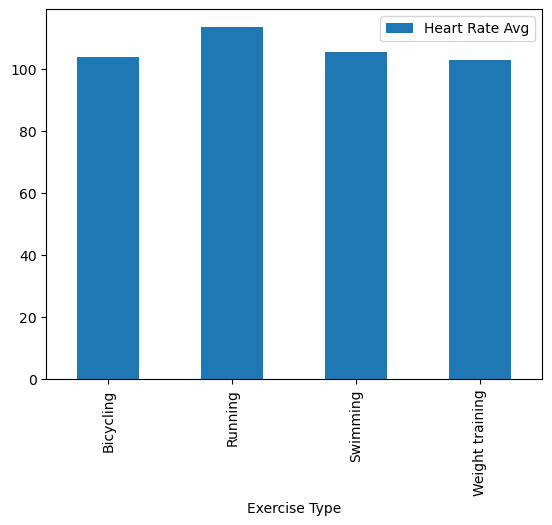

In [42]:
graph_frame.plot.bar(y='Heart Rate Avg')

If we filtered graph_frame down to a single column we wouldn't even need `y`.

<Axes: xlabel='Exercise Type'>

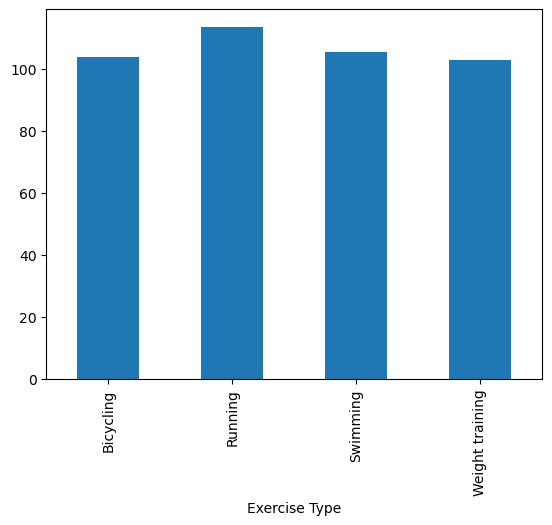

In [43]:
graph_frame['Heart Rate Avg'].plot.bar()

We can also graph multiple columns next to each other using the same trick.

<Axes: xlabel='Exercise Type'>

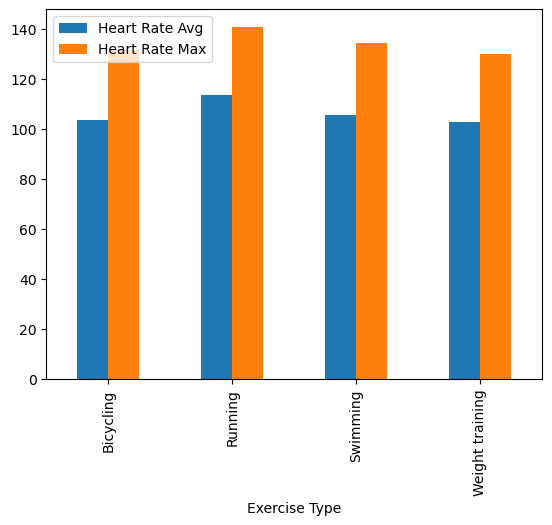

In [44]:
graph_frame[['Heart Rate Avg', 'Heart Rate Max']].plot.bar()

If we wanted these stacked we can pass `stacked=True` to `bar`.

<Axes: xlabel='Exercise Type'>

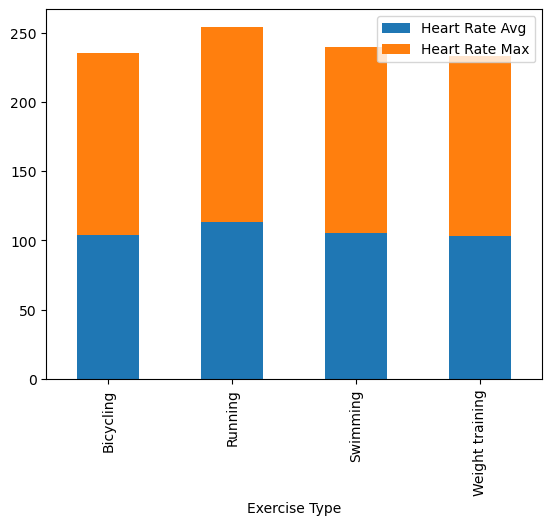

In [45]:
graph_frame[['Heart Rate Avg', 'Heart Rate Max']].plot.bar(stacked=True)

#### Below, use groupby to group by measuring device and then make a bar chart that compares average heart rate across measuring devices.

In [46]:
# your code goes here


This concludes summary statistics. If you want to go deeper into statistics (or matplotlib) you'll want to do the optional module Using Other Packages with Pandas.